### <b style = color:purple>Regression Metrics</b> 

We use some metrics for the validation of our model. For Regression based models we normally use MAE, MSE, RMSE, R2 Score, Adjusted Score.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.sample(3)

,cgpa,package
147,5.66,2.21
90,7.11,2.66
183,7.28,2.72


In [4]:
X = df.iloc[:,0:1]         #Input must be 2-D.
y = df.iloc[:,-1]          #Output feature takes 1-D and 2-D data.

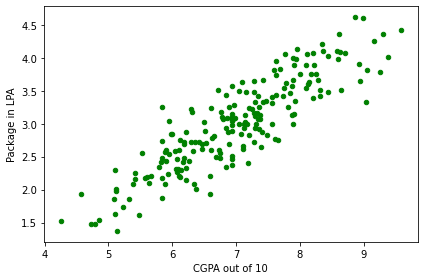

In [15]:
plt.scatter(X,y,c='green',s=20)
plt.xlabel('CGPA out of 10')
plt.ylabel('Package in LPA')
plt.tight_layout()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
lr.coef_

array([0.55795197])

In [10]:
lr.intercept_

-0.8961119222429144

In [11]:
lr.predict(X_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

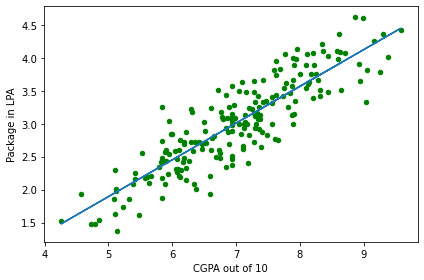

In [17]:
plt.scatter(X,y,c='green',s=20)
plt.plot(X_train,lr.predict(X_train))     #Draw a line on the predicted values on training data.
plt.xlabel('CGPA out of 10')
plt.ylabel('Package in LPA')
plt.tight_layout()

#### <b style = "color:purple">Importing metric functions.</b>

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#### <b style = "color:purple">MAE (Mean Absolute Error)</b>

In [21]:
y_pred = lr.predict(X_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [23]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [38]:
print("MAE is :",mean_absolute_error(y_test,y_pred),"in LPA")
#

MAE is : 0.2884710931878175 in LPA


In [39]:
print("MSE is : {} in LPA squared".format(mean_squared_error(y_test,y_pred)))

MSE is : 0.12129235313495527 in LPA squared


In [40]:
print(f"RMSE is : {np.sqrt(mean_squared_error(y_test,y_pred))} in LPA" )

RMSE is : 0.34827051717731616 in LPA


In [57]:
"""
This means my cgpa column is able to explain some percentage of variance in our output column. 
Rest depends on real life factors.
"""
print(f"R2 score is : {r2_score(y_test,y_pred)} in absolute unit" )
print(f'R2 score in percentage: {round((r2_score(y_test,y_pred) * 100),2)}')

R2 score is : 0.780730147510384 in absolute unit
R2 score in percentage: 78.07


#### <b style = "color:purple">Calculating Adjusted R2 score</b>

In [58]:
r2 = r2_score(y_test,y_pred)

In [61]:
X_test.shape[0]

40

In [69]:
"""
Rule for calculating the adjusted r2 square.
adjusted r2 score = 1 - ((1 - r2) * (n-1)) / (n-1-k))
"""

num = (1-r2) * (X_test.shape[0]-1)         #here n = X_test.shape[0] 
den = X_test.shape[0]-1-X_test.shape[1]    #here k = X_test.shape[1]

adjusted_r2 = 1 - (num / den)
print(f"Adjusted r2 score is : {adjusted_r2}")
print(f"Adjusted r2 score rounded upto 2 decimal points : {round(adjusted_r2*100,2)}")

Adjusted r2 score is : 0.7749598882343415
Adjusted r2 score rounded upto 2 decimal points : 77.5


####  <b style = "color:purple">Calculating Adjusted R2 score after adding an <b style = "color:orange">irrelevant</b> column</b>

In this case, If we add an irrelevant column then the adjusted r2 score will be less than  the original r2 score. If there's a great deal of difference between r2 score and adjusted r2 score, then we will work with adjusted r2 score for better results.

In [75]:
df1 = df.copy()

In [76]:
df1.sample(3)

,cgpa,package
66,5.11,1.63
98,7.69,3.83
23,6.19,2.48


In [77]:
rand_val = np.random.random(200)
df1['random_values'] = rand_val

In [81]:
df1 = df1[['cgpa','random_values','package']]   #Reorganizing the columns so that the output column stays at last.
df1.head()

,cgpa,random_values,package
0,6.89,0.781159,3.26
1,5.12,0.260802,1.98
2,7.82,0.847033,3.25
3,7.42,0.508543,3.67
4,6.94,0.748441,3.57


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

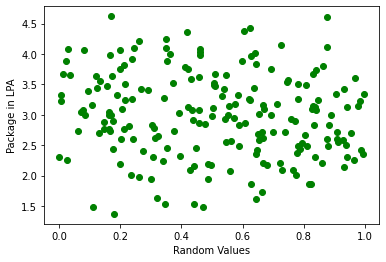

In [129]:
"""
This random_values column has no relation or contribution to the package column. In short, It's not at all relevant to
our output column.
"""
plt.scatter(df1['random_values'],df1['package'],color = 'green')
plt.ylabel('Package in LPA')
plt.xlabel('Random Values')
plt.tight_layout

In [94]:
X1 = df1.iloc[:,0:2]
y1 = df1.iloc[:,-1]

In [96]:
y1

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [112]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=2)

In [113]:
lr1 = LinearRegression()

In [114]:
lr1.fit(X1_train,y1_train)

LinearRegression()

In [115]:
y_pred1 = lr1.predict(X1_test)

In [121]:
"""
r2 score increases as we add another column but this is not desired because the column we added is irrelevant.
"""

r2_score1 = r2_score(y1_test,y_pred1)
print(f"R2 score is : {r2_score1}")

R2 score is : 0.7808415707913196


In [120]:
"""
Here adjusted r2 score is less than the actual r2 score. That proves that our newly added column is a lot less relevant 
to our output column.
"""

num = (1-r2_score1) * (X1_test.shape[0]-1)         #here n = X_test.shape[0] 
den = X1_test.shape[0]-1-X1_test.shape[1]          #here k = X_test.shape[1]

adjusted_r2 = 1 - (num / den)
print(f"Adjusted r2 score is : {adjusted_r2}")
print(f"Adjusted r2 score rounded upto 2 decimal points : {round(adjusted_r2*100,2)}")

Adjusted r2 score is : 0.7689951692124719
Adjusted r2 score rounded upto 2 decimal points : 76.9


####  <b style = "color:purple">Calculating Adjusted R2 score after adding a <b style = "color:orange">relevant</b> column</b>

In [128]:
df2 = df.copy()
df2['relevant_col'] = df2['package'] + (np.random.randint(-12,12,200)/10)
df2 = df2[['cgpa','relevant_col','package']]
df2.sample(5)

,cgpa,relevant_col,package
5,7.89,3.19,2.99
15,7.25,2.13,3.23
197,7.21,2.44,3.24
60,5.61,1.59,2.19
99,6.61,3.44,3.24


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

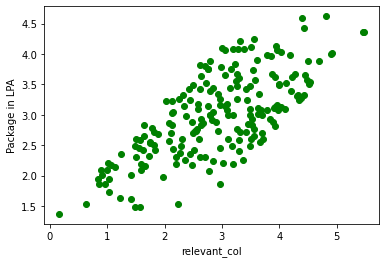

In [131]:
"""
After adding up a relevant column and then plotting that relevant column agianst the output column
gives us a sort of linear relationship in the figure.
"""
plt.scatter(df2['relevant_col'],df2['package'],color = 'green')
plt.ylabel('Package in LPA')
plt.xlabel('relevant_col')
plt.tight_layout

In [132]:
X2 = df2.iloc[:,0:2]
y2 = df2.iloc[:,-1]

In [134]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=2)

In [135]:
lr2 = LinearRegression()

In [136]:
lr2.fit(X2,y2)

LinearRegression()

In [137]:
y_pred2 = lr2.predict(X2_test)

In [139]:
"""
r2 score increases as we add another column but this time it is desired because the column we added is relevant.
"""

r2_score2 = r2_score(y2_test,y_pred2)
print(f"R2 score is : {r2_score2}")

R2 score is : 0.8039851580544175


In [142]:
"""
Here adjusted r2 score is less than the actual r2 score but it is greater than the adjusted r2 score when 
we worked on a single relevant column and this time we have 2 relevant columns.
"""

num = (1-r2_score2) * (X2_test.shape[0]-1)         #here n = X_test.shape[0] 
den = X2_test.shape[0]-1-X2_test.shape[1]          #here k = X_test.shape[1]

adjusted_r2 = 1 - (num / den)
print(f"Adjusted r2 score is : {adjusted_r2}")
print(f"Adjusted r2 score rounded upto 2 decimal points : {round(adjusted_r2*100,2)}")

Adjusted r2 score is : 0.7933897611924942
Adjusted r2 score rounded upto 2 decimal points : 79.34
